# Вариант 3

Построить модель линейной регрессии на имеющихся данных

In [30]:
import torch
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [85]:


df_x = pd.read_csv('x.csv')
df_y = pd.read_csv('y.csv')

df_x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [86]:
df_x = df_x.rename({'Unnamed: 0': "first"}, axis=1)
df_y = df_y.rename({'Unnamed: 0': "first"}, axis=1)

res = pd.merge(df_x, df_y, on = 'first' ) # , on=0)

In [87]:
df_res = res.iloc[:, [1,2]]
df_res.head()

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


Зашумим входные данные

In [88]:
noise = np.random.randint(-100, 340, size=20) / 10
df_res['0_y'] = df_res['0_y'] + noise

<ipython-input-88-aa757312d54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['0_y'] = df_res['0_y'] + noise


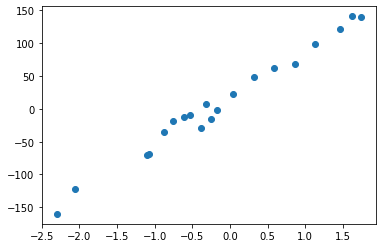

In [89]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.show()

In [106]:
from sklearn.model_selection import train_test_split

In [120]:
x = df_res["0_x"]
y = df_res["0_y"]

# x['second'] = 1

x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2, random_state=1)

In [122]:
x_train = torch.from_numpy(x_train.reshape(-1, 1)).float()
y_train = torch.from_numpy(y_train.reshape(-1, 1)).float()

In [109]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [117]:
model = linearRegression(1, 1)
loss = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [123]:
for epoch in range(5):
   
    optimizer.zero_grad()

    outputs = model(x_train)

   
    loss = loss(outputs, torch.Tensor(y_train))
    print(loss)

    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))


RuntimeError: ignored

In [ ]:
from sklearn.metrics import r2_score

#если бы у меня получилось запустить, я бы считала коэффициент детерминации через r2_score
from sklearn.metrics import mean_squared_error
#а средний квадррат ошибки через это

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.

